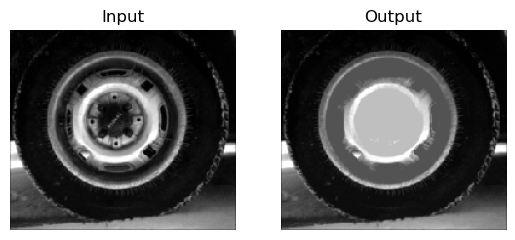

In [80]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

grayscale_image = cv2.imread('q2_wheel.png', cv2.IMREAD_GRAYSCALE)

def erosion(image, kernel_size):
    h, w = image.shape
    result_image = image.copy()

    for row in range(h):
        for col in range(w):
            neighborhood = image[max(0, row - kernel_size // 2):min(h, row + kernel_size // 2 + 1),
                                 max(0, col - kernel_size // 2):min(w, col + kernel_size // 2 + 1)]
            
            result_image[row][col] = neighborhood.min()
    return result_image

def reconstruction_by_erosion(image, marker, kernel_size):
    h, w = image.shape
    eroded = erosion(image, kernel_size)
    result_image = np.maximum(eroded, marker)
    return result_image     
    
            
def fill(image):
    h, w = image.shape
    #Make marker as 255 for all pixels except borders
    marker = np.copy(image)
    marker[1:-1, 1:-1] = image.max()
            
    result_image = reconstruction_by_erosion(marker, image, 5)
    
    while not result_image.sum() == reconstruction_by_erosion(result_image, image, 5).sum():
        result_image = reconstruction_by_erosion(result_image, image, 5)

    return result_image   



plt.subplot(1, 2, 1)
plt.imshow(grayscale_image, cmap='gray')
plt.title('Input')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(fill(grayscale_image), cmap='gray') 
plt.title('Output')
plt.axis('off')

plt.show()

## Compare The result with skimage.morphology

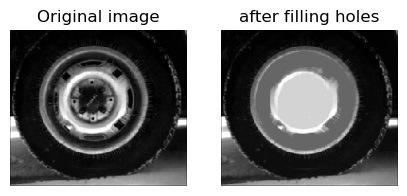

In [81]:
import numpy as np
from skimage.morphology import reconstruction


image = cv2.imread('q2_wheel.png', cv2.IMREAD_GRAYSCALE)
seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')

fig, ax = plt.subplots(1, 2, figsize=(5, 4), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')
ax[1].set_title('after filling holes')
ax[1].axis('off')

plt.show()
